In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

year  january  february  march  april   may  june  july  august  \
0   1958     1.54      1.40   0.99   0.31  0.32  0.30  0.04    0.24   
1   1959     0.43      0.50   0.26   0.27 -0.01 -0.33 -0.28   -0.41   
2   1960     0.02     -0.24  -0.08   0.01  0.05 -0.20 -0.25    0.00   
3   1961    -0.15      0.04  -0.10   0.13 -0.01  0.10 -0.32   -0.25   
4   1962    -0.25     -0.16  -0.41  -0.32 -0.42 -0.22 -0.30   -0.13   
5   1963    -0.32     -0.26  -0.06  -0.06  0.00  0.12  0.72    0.90   
6   1964     0.76      0.55  -0.16  -0.53 -0.74 -0.88 -0.65   -0.76   
7   1965    -0.57     -0.36  -0.34  -0.09  0.19  0.45  0.81    1.25   
8   1966     1.13      0.83   0.83   0.54 -0.06  0.14  0.23   -0.10   
9   1967    -0.55     -0.56  -0.47  -0.53 -0.24 -0.12 -0.10   -0.31   
10  1968    -0.60     -0.74  -0.76  -0.47 -0.44  0.19  0.31    0.33   
11  1969     0.90      1.02   0.61   0.33  0.39  0.26  0.10    0.52   
12  1970     0.55      0.36   0.26   0.18  0.01 -0.30 -0.98   -0.95   
13  1971    -1.47     -1.28  -1.29  -0.97 -0.82 -0.78 -0.64   -0.65   
14  1972    -0.58     -0.22  -0.25   0.21  0.33  0.66  0.83    1.30   
15  1973     1.60      1.08   0.58  -0.07 -0.56 -0.86 -1.14   -1.21   
16  1974    -2.02     -1.50  -1.44  -1.00 -0.79 -0.70 -0.65   -0.32   
17  1975    -0.37     -0.33  -0.59  -0.59 -1.00 -1.25 -1.24   -1.16   
18  1976    -1.80     -1.05  -0.68  -0.42 -0.49  0.00  0.15    0.31   
19  1977     0.84      0.55   0.40  -0.25 -0.03  0.36  0.45    0.25   
20  1978     0.72      0.51   0.06  -0.37 -0.49 -0.45 -0.48   -0.62   
21  1979     0.05      0.09   0.13   0.17 -0.09  0.04 -0.20    0.21   
22  1980     0.55      0.33   0.09   0.20  0.13  0.37  0.02   -0.23   
23  1981    -0.45     -0.45  -0.02  -0.17 -0.11 -0.15 -0.43   -0.18   
24  1982    -0.04     -0.13  -0.02   0.24  0.65  0.92  0.64    0.93   
25  1983     2.43      2.22   1.69   1.12  1.12  0.62 -0.11   -0.13   
26  1984    -0.80     -0.53  -0.48  -0.60 -0.64 -0.90 -0.40   -0.40   
27  1985    -0.89     -0.91  -0.96  -0.98 -0.90 -0.76 -0.61   -0.49   
28  1986    -0.79     -0.64  -0.51  -0.41 -0.47 -0.08  0.16    0.24   
29  1987     1.19      1.17   1.24   0.89  0.91  1.24  1.34    1.48   
30  1988     0.69      0.35   0.29  -0.49 -1.05 -1.46 -1.54   -1.44   
31  1989    -1.95     -1.37  -1.33  -1.11 -0.80 -0.64 -0.47   -0.58   
32  1990     0.02      0.36   0.20   0.26  0.32  0.00  0.15    0.17   
33  1991     0.51      0.32   0.10   0.21  0.44  0.65  0.62    0.43   
34  1992     1.61      1.62   1.50   1.41  1.27  0.53  0.27   -0.15   
35  1993     0.28      0.42   0.47   0.92  0.93  0.64  0.33    0.16   
36  1994     0.03     -0.16  -0.06   0.03  0.14  0.27  0.16    0.52   
37  1995     1.10      0.87   0.49   0.27  0.03  0.08  0.03   -0.38   
38  1996    -0.65     -0.66  -0.48  -0.34 -0.40 -0.12 -0.14   -0.30   
39  1997    -0.43     -0.24  -0.06   0.34  0.87  1.15  1.60    1.94   
40  1998     2.42      2.08   1.49   0.90  0.68 -0.39 -0.73   -0.83   
41  1999    -1.53     -1.41  -0.92  -0.81 -0.87 -0.95 -0.84   -0.98   
42  2000    -1.79     -1.53  -1.26  -0.80 -0.80 -0.75 -0.57   -0.36   
43  2001    -0.88     -0.63  -0.48  -0.30 -0.30 -0.11  0.01   -0.07   
44  2002    -0.14      0.00   0.11   0.14  0.21  0.68  0.57    0.70   
45  2003     0.98      0.64   0.48  -0.03 -0.52 -0.19  0.14    0.05   
46  2004     0.26      0.17  -0.10   0.06  0.10  0.14  0.41    0.66   
47  2005     0.56      0.26   0.28   0.28  0.30  0.22 -0.01   -0.04   
48  2006    -0.98     -0.71  -0.73  -0.30 -0.11  0.09  0.03    0.37   
49  2007     0.59      0.12  -0.15  -0.16 -0.39 -0.16 -0.37   -0.57   
50  2008    -1.79     -1.70  -1.17  -0.89 -0.64 -0.44 -0.04   -0.04   
51  2009    -1.00     -0.71  -0.72  -0.25  0.17  0.49  0.69    0.62   
52  2010     1.43      1.18   1.07   0.56 -0.15 -0.62 -0.89   -1.33   
53  2011    -1.70     -1.26  -0.98  -0.74 -0.53 -0.25 -0.23   -0.66   
54  2012    -0.93     -0.61  -0.48  -0.29 -0.18  0.14  0.44    0.66   
55  2013    -0.42     -0.40 

In [3]:
df_month = pd.read_csv("kendall_corr.csv")
df_month

November_7     May_6   April_7   October  August_3  December_2  \
0    -0.414703  0.426002  0.133591 -0.338700  0.577440   -0.233301   
1    -0.414703  0.343893  0.146146 -0.338700  0.577440   -0.233301   
2     0.119779  0.197382  0.100033  0.326479  0.806378   -0.675635   
3    -0.082401 -0.069665  0.006054 -0.092277  0.512310   -0.410518   
4    -1.015143 -0.835852 -0.124219  0.080417  0.211962   -0.230980   
5    -0.818627 -0.070522  0.016689  0.084982 -0.290574   -0.454416   
6    -1.069754 -0.573413  0.154757  0.017253  0.582391   -0.428709   
7    -0.768627  0.461886 -0.186963 -0.001182  0.066570   -0.485894   
8    -0.137888  0.548707  0.084944 -0.158109  0.594337   -0.251346   
9    -0.548753 -0.522139  0.120713 -0.083500  0.498273   -0.357940   
10   -0.530598  0.147972 -0.002915 -0.437804  0.542509   -0.030573   
11   -0.857654  0.447703  0.147970 -0.633326 -0.133022   -0.486048   
12   -0.811415 -0.126166  0.179310  0.156364  0.823436   -0.153545   
13   -1.169312 -0.078589  0.302660 -0.444139  0.483234   -0.411928   
14   -0.400256  0.200709  0.076961 -0.364873 -0.394600   -0.103696   
15   -1.089294  0.359966  0.117638  0.330288  0.621513   -0.441663   
16   -1.062109 -0.485582  0.189012 -0.158166  0.005352   -0.510809   
17   -1.445140 -0.098261  0.049449  0.221391  0.470284    0.166106   
18   -0.438656  0.033565 -0.051335 -0.175904 -0.282387   -0.444339   
19   -0.700344  0.759252 -0.146433  0.338835 -0.322828   -0.553474   
20   -0.036264  0.140413  0.317657  0.330402  0.682713   -0.136651   
21    0.033722  0.153274 -0.127904  0.010875 -0.038600   -0.229183   
22   -0.364840  0.216580  0.162633 -0.233859  0.127533   -0.135916   
23   -0.772920 -0.012037  0.458715 -0.205417  0.245341   -0.238661   
24   -0.658674 -0.000847  0.094069 -0.191726 -0.404809   -0.453884   
25   -0.318289  0.600718  0.005257 -0.117580  0.793525   -0.204982   
26   -0.392938  0.361158  0.021758 -0.008723  0.155925   -0.172416   
27   -0.763604 -0.469536 -0.043283  0.246292  0.116156   -0.886626   
28    0.254993  0.169024 -0.182786 -0.073152  0.060142   -0.288673   
29    0.502166  0.776547  0.105175  0.224870  0.714239   -0.516111   
30   -0.202859 -0.194545  0.161175  0.525890  1.229435   -0.064378   
31   -1.104039 -0.471821  0.242990  0.035792  0.202320   -0.208003   
32    0.043108  0.262121 -0.107454 -0.319261  0.147966   -0.351253   
33   -0.015937  0.296479 -0.272283 -0.142504  0.198766   -0.444716   
34   -0.036404  0.961588 -0.103149 -0.284066 -0.647471   -0.142551   
35    0.164452  0.547697 -0.157881 -0.251550 -0.348586   -0.302652   
36    0.132246  0.308813  0.277105 -0.239423  0.169143   -0.363727   
37   -1.059555 -0.162653 -0.117465 -0.167167  0.350897   -0.119492   
38   -0.496676 -0.295998  0.010101 -0.115201  0.431102   -0.263344   
39    0.037235  0.408300 -0.420608 -0.266979 -0.076090   -0.713316   
40   -1.671818  0.205959  0.353169 -0.203214 -0.317858   -0.351209   
41   -1.154535 -0.747444  0.159591 -0.181689  0.152743   -0.274645   
42   -0.586629 -0.261200  0.043581  0.160805  0.138711   -0.030522   
43   -1.054226  0.075356  0.015448 -0.032616  0.723950   -0.065773   
44   -0.426612  0.174079 -0.237113  0.042221 -0.340012   -0.300018   
45    0.101509 -0.037975 -0.155063  0.019863  0.580025   -0.501479   
46   -0.221160 -0.390822  0.127236 -0.231457 -0.154983   -0.473571   
47   -0.410010  0.677045  0.286343 -0.180083 -0.085728   -0.442984   
48   -0.526568 -0.148528  0.306458 -0.523550  0.224066   -0.601254   
49   -0.523534 -0.394659 -0.186369  0.092774  0.841855   -0.337605   
50   -0.619278 -0.063721  0.410396 -0.058950  0.433475   -0.461946   
51   -0.749957 -0.007191 -0.117755  0.131908 -0.042938   -0.551127   
52   -0.979028 -0.246229  0.263265  0.129002  0.560965   -0.262369   
53   -0.817030 -0.500057  0.343352 -0.031445  0.133667   -0.316473   
54   -1.084560 -0.121197 -0.306003 -0.435052  0.783340   -0.510359   
55   -0.568609 -0.329198 -0.341614  0.041280 -0.278042    0.007997   
56   -0.161185

In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.96206982e-01,  8.00392258e-01,  4.68800272e-01,
        -1.05186079e+00,  8.37058200e-01,  4.63406536e-01,
         1.00704222e+00,  5.72517314e-02, -8.61740180e-04,
         8.36360147e-01],
       [ 1.96206982e-01,  5.99962738e-01,  5.40242756e-01,
        -1.05186079e+00,  8.37058200e-01,  4.63406536e-01,
         1.00704222e+00,  1.17578300e+00, -8.61740180e-04,
         2.60135554e-01],
       [ 1.26539456e+00,  2.42325872e-01,  2.77842071e-01,
         1.63739144e+00,  1.39762905e+00, -1.80468815e+00,
        -1.05673058e+00, -7.39545568e-01, -2.92204700e-01,
         1.08526806e+00],
       [ 8.60950296e-01, -4.09545368e-01, -2.56930982e-01,
        -5.55960520e-02,  6.77581581e-01, -4.45288575e-01,
        -1.07000855e-01,  5.74292531e-01, -5.55289382e-02,
        -1.65215525e+00],
       [-1.00492358e+00, -2.27982730e+00, -9.98228211e-01,
         6.42589240e-01, -5.78406904e-02,  4.75304114e-01,
        -2.70586209e-01,  6.11750441e-01,  3.25574319e-01,
         1.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[-1.47227458,  0.55246073, -0.01423719,  0.30390221,  1.04123018,
         1.53844362, -0.21366782, -0.87091215,  0.30927054,  0.00871995],
       [ 0.39980905,  0.91023503, -0.99370166,  0.64981022, -1.52375434,
         0.23963755, -1.30719891,  0.13949488,  0.3964202 , -1.55002498],
       [ 1.97512047,  0.14174452, -0.67549985,  0.54646797,  0.69425834,
        -0.87738844,  0.14363979, -0.01487948, -1.75832353,  0.74404162],
       [ 1.01264568, -1.1369821 ,  0.41929119, -0.61516424, -1.07768958,
        -0.72264986,  1.54521584,  1.54936741,  0.29484982,  0.35206372],
       [ 0.44933151,  2.73299469,  1.03633024, -0.37770529, -0.91072967,
        -0.55305608,  1.12031226, -0.31543118,  0.30302576,  0.81796596],
       [ 0.10165494, -0.25890067,  1.11433721, -1.96525964, -0.16388436,
        -1.43060358,  0.30601799,  0.57137162, -1.28031473, -0.56525488],
       [ 0.11070617, -1.15088632, -0.79691158,  0.88347219,  1.32547502,
         0.03123431, -0.20067838, -1.37750287

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 18}
Best Score: 0.3878335032270863
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 49}
Best Score: 0.28982377601445647
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 15}
Best Score: 0.28420603787202636
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 23}
Best Score: 0.25699869130679326
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 7}
Best Score: 0.2713474727092378


In [13]:
y_pred_list

[array([-0.28615282,  0.31107197,  0.15656784, -0.28575033,  0.1092912 ,
        -0.15368898, -0.38227884, -0.03293653,  0.42769088, -0.55600392,
        -0.42026506,  0.03352917, -0.28740578,  0.32896322,  0.29084684,
         0.07230081]),
 array([-0.51425715,  0.35575397, -0.06128659, -0.31491913,  0.2114953 ,
        -0.08705   , -0.32074241, -0.13033141,  0.30918999, -0.77055288,
        -0.51622744, -0.16296947, -0.35596598,  0.25212853,  0.49409006,
         0.12569408]),
 array([-0.27560881,  0.32064815,  0.30033027, -0.16961786,  0.0562232 ,
        -0.18615095, -0.3605438 , -0.14480833,  0.53416667, -0.72341587,
        -0.49066548,  0.34607937, -0.03927685,  0.53914907,  0.28172934,
        -0.13276915]),
 array([-0.44316143,  0.1628911 ,  0.35727877, -0.01329165,  0.07802367,
         0.01094803, -0.42546042,  0.02050744,  0.58553139, -0.72651719,
        -0.41966199,  0.11063787,  0.01548646,  0.75902456,  0.44138932,
        -0.25057782]),
 array([-0.20955117,  0.51067777

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7188159453227791,
 0.8438021035721017,
 0.7013882276810601,
 0.6987610760951721,
 0.6512145967851565]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 18}
Best Score: 0.3878335032270863
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 49}
Best Score: 0.28982377601445647
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 15}
Best Score: 0.28420603787202636
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 23}
Best Score: 0.25699869130679326
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 7}
Best Score: 0.2713474727092378


In [21]:
y_pred_list_rf

[array([-0.28615282,  0.31107197,  0.15656784, -0.28575033,  0.1092912 ,
        -0.15368898, -0.38227884, -0.03293653,  0.42769088, -0.55600392,
        -0.42026506,  0.03352917, -0.28740578,  0.32896322,  0.29084684,
         0.07230081]),
 array([-0.51425715,  0.35575397, -0.06128659, -0.31491913,  0.2114953 ,
        -0.08705   , -0.32074241, -0.13033141,  0.30918999, -0.77055288,
        -0.51622744, -0.16296947, -0.35596598,  0.25212853,  0.49409006,
         0.12569408]),
 array([-0.27560881,  0.32064815,  0.30033027, -0.16961786,  0.0562232 ,
        -0.18615095, -0.3605438 , -0.14480833,  0.53416667, -0.72341587,
        -0.49066548,  0.34607937, -0.03927685,  0.53914907,  0.28172934,
        -0.13276915]),
 array([-0.44316143,  0.1628911 ,  0.35727877, -0.01329165,  0.07802367,
         0.01094803, -0.42546042,  0.02050744,  0.58553139, -0.72651719,
        -0.41966199,  0.11063787,  0.01548646,  0.75902456,  0.44138932,
        -0.25057782]),
 array([-0.20955117,  0.51067777

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7188159453227791,
 0.8438021035721017,
 0.7013882276810601,
 0.6987610760951721,
 0.6512145967851565]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook
    
print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/kendall/comparison plots/randomforest


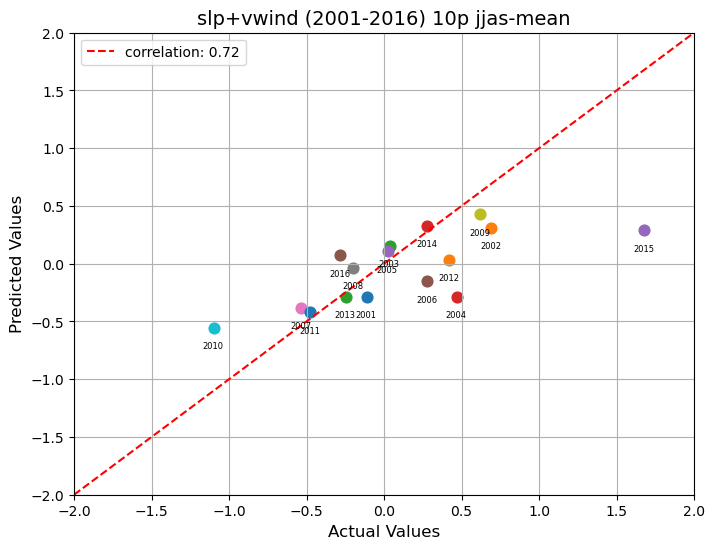

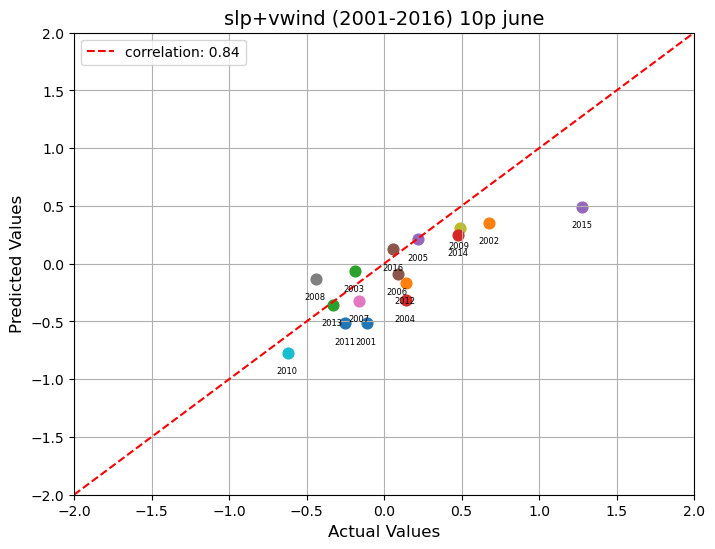

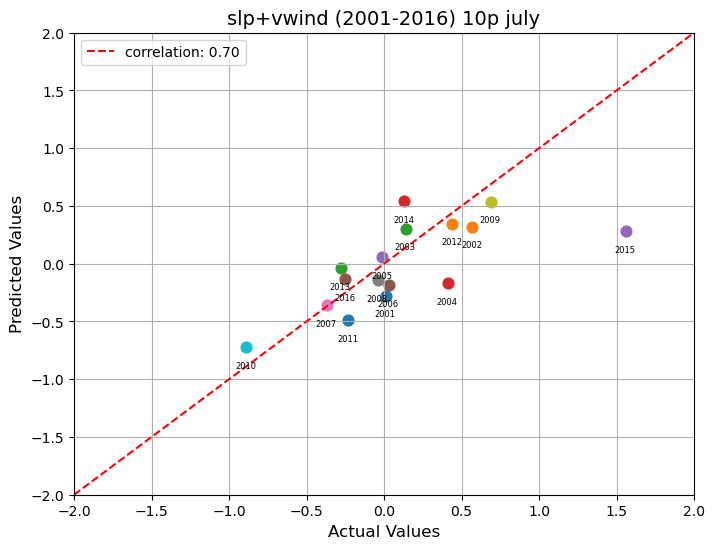

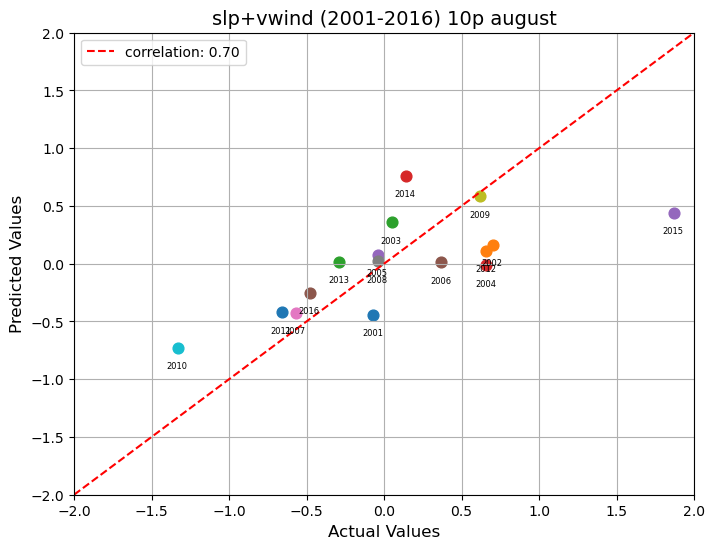

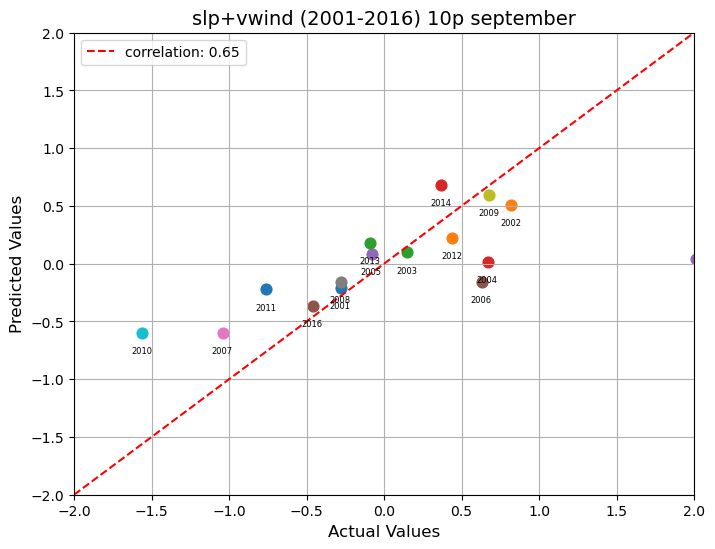

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show